# Before jumping to the code implementation
- 보시는 동영상에는 git을 사용하라고 말씀드리고 있는데, 각 주차마다 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture2-GLM_Multiple_Comparisons_code_only.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture2-GLM_Multiple_Comparisons_code_only.ipynb --output Lecture2-GLM_Multiple_Comparisons_code_only.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생은 이번주차는 처음이라 상관없지만, 두 번째 주차부터는 git은 existing directory에는 clone을 하지 않으므로 디렉토리 (~/Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

# Verfication
- Question: Is the height of students related to the level of their daily stress and nutrient? 

### Regression:
$Height\ of\ student=\theta _{0}+\theta_{1}\times Daily\ stress\ +\theta_{2}\times Nutrient \ level$<br><br>
<i>Linear regression model: </i>
$\hat{y}=\theta _{0}+\theta_{1}{x}_{1}+\theta_{2}{x}_{2}+\ \cdot\cdot\cdot\ +\theta_{n}{x}_{n}\ +\varepsilon$
- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- ${x}_i$ is the ${i}^{th}$ feature value.
- $\theta_j$ is the ${j}^{th}$ model parameter (including the bias term $\theta_{0}$).

In [2]:
import numpy as np
import statsmodels.api as sm

In [3]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [4]:
model = sm.OLS(y, x)
results = model.fit()

In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 07 Sep 2020   Prob (F-statistic):            0.00713
Time:                        12:58:18   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


- Coefficient of determination, denotes as 𝑅²: amount of variation in y that can be explained by a given regression model (larger 𝑅² indicates a better fit). 
- The value 𝑅² = 1 corresponds to MSE = 0, that is to the <b>perfect fit</b> since the values of predicted and actual responses fit completely to each other.
- Adjusted 𝑅²: A modified version of 𝑅² that has been adjusted for the number of independent variables (IVs) in the model. The adjusted R-squared increases only if the newly added IV significantly improve the model accountability more than what could be improved by simply increasing the # of IVs.

# General Linear Model
- A single conceptual model that allows you to perform most statistical tests mentioned in previous slides.
- Let's take an example: A task to assess the relationship between psychopathy and a level of clamminess measured by skin-conductance scores when students do hand-shake

In [6]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

# Only show 6 decimals when printing  
np.set_printoptions(precision=6)

In [27]:
psychopathy = [11.416,  4.514,   12.204,  14.835,
               8.416,   6.563,   17.343,  13.02,
               15.19 ,  11.902,  22.721,  22.324]

clammy = [0.389,  0.2  ,  0.241,  0.463,
          4.585,  1.097,  1.642,  4.972,
          7.957,  5.585,  5.527,  6.964]

Text(0, 0.5, 'Psychopathy score')

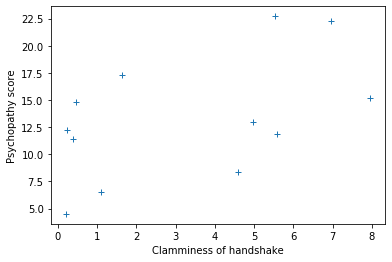

In [8]:
plt.plot(clammy, psychopathy, '+')
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

- Maybe some linear relationship? ...
- One can draw a line that can explain their relationship based on a first-order linear equation ($y = c + bx$).
- Let's try an intercept of an 10 slope 0.9:

Text(0.5, 1.0, 'Clammy vs psychopathy with guessed line')

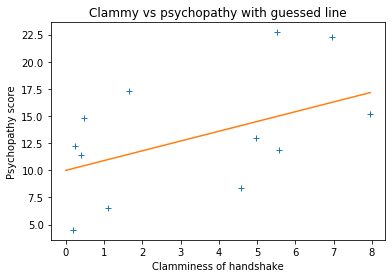

In [9]:
def my_line(x):
    # My prediction for psychopathy given clamminess
    return 10 + 0.9 * x

x_vals = [0, max(clammy)]
y_vals = [my_line(0), my_line(max(clammy))]

# Plot the data
plt.plot(clammy, psychopathy, '+')
plt.plot(x_vals, y_vals)
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')
plt.title('Clammy vs psychopathy with guessed line')

- Our model: $y_{i}\ \approx c + bx_{i}$ where $c$ is the intercept and $b$ is the slope (our heuristic: $y_{i}\ \approx 10 + 0.9x_{i}$)
- Note the meaning of "$\approx$" above: our model cannot explain all the variation in our psychopathy data. Thus we need another term to represent this error ($\varepsilon$).
- Now let's build a matrix form of this model as done in the previous example.

$\tiny\left[\begin{array}{c}
11.416 \\
4.514 \\
12.204 \\
14.835 \\
8.416 \\
6.563 \\
17.343 \\
13.02 \\
15.19 \\
11.902 \\
22.721 \\
22.324
\end{array}\right]=\left[\begin{array}{cc}
1 & 0.389 \\
1 & 0.2 \\
1 & 0.241 \\
1 & 0.463 \\
1 & 4.585 \\
1 & 1.097 \\
1 & 1.642 \\
1 & 4.972 \\
1 & 7.957 \\
1 & 5.585 \\
1 & 5.527 \\
1 & 6.964
\end{array}\right]$
$\tiny\left[\begin{array}{l}
c \\
b
\end{array}\right]$
+
$\tiny\left[\begin{array}{c}
e_{1} \\
e_{2} \\
e_{3} \\
e_{4} \\
e_{5} \\
e_{6} \\
e_{7} \\
e_{8} \\
e_{9} \\
e_{10} \\
e_{11} \\
e_{12}
\end{array}\right]$<br><br>
In symbols:<br>
$\tiny\vec{y}=X\overrightarrow\theta+\vec{e}$, <br> where X is called a 'design matrix', $\theta$ is parameters and $e$ is a 'residual' or 'error'.

- What if you want to consider an aging effect?
- Multiple regression allows to have multiple independent variables. So let's add an age term.

In [26]:
age = [22.5,  25.3,  24.6,  
       21.4, 20.7,  23.3,  
       23.8,  21.7, 21.3,  
       25.2,  24.6,  21.8]






$\tiny\left[\begin{array}{c}
11.416 \\
4.514 \\
12.204 \\
14.835 \\
8.416 \\
6.563 \\
17.343 \\
13.02 \\
15.19 \\
11.902 \\
22.721 \\
22.324
\end{array}\right]=\left[\begin{array}{cc}
1 & 0.389 & 22.5\\
1 & 0.2   & 25.3 \\
1 & 0.241 & 24.6 \\
1 & 0.463 & 21.4 \\
1 & 4.585 & 20.7 \\
1 & 1.097 & 23.3 \\
1 & 1.642 & 23.8 \\
1 & 4.972 & 21.7 \\
1 & 7.957 & 21.3 \\
1 & 5.585 & 25.2 \\
1 & 5.527 & 24.6 \\
1 & 6.964 & 21.8
\end{array}\right]$
$\tiny\left[\begin{array}{l}
c \\
b
\end{array}\right]$
+
$\tiny\left[\begin{array}{c}
e_{1} \\
e_{2} \\
e_{3} \\
e_{4} \\
e_{5} \\
e_{6} \\
e_{7} \\
e_{8} \\
e_{9} \\
e_{10} \\
e_{11} \\
e_{12}
\end{array}\right]$&emsp;&emsp;&emsp;$\rightarrow$&emsp;&emsp;&emsp;
$\tiny\begin{bmatrix} y^{1} \\ y^{2} \\ y^{3} \\ \vdots \\ y^{m} \end{bmatrix}=\begin{bmatrix} 1 & X_{1}^{1} & X_{3}^{1} & \ldots & x_{n}^{1} & \\ 1 & X_{1}^{2} & X_{2}^{2} & \ldots & x_{n}^{2} \\ 1 & X_{1}^{3} & X_{2}^{3} & \ldots & x_{n}^{3} \\ \vdots & \vdots & \vdots & \ddots & \vdots & \\ 1 & X_{1}^{m} & X_{2}^{m} & \ldots & x_{n}^{m}\end{bmatrix}\begin{bmatrix} \theta _{0} \\ \theta _{1} \\ \theta _{2} \\ \vdots \\ \theta_{n}\end{bmatrix}+\begin{bmatrix} e_{0} \\ e_{1} \\ e_{2} \\ \vdots \\ e_{m}\end{bmatrix}$

<center>In symbols:</center>
<center>${y}_{i}=c+b_{1} x_{1, i}+b_{2} x_{2, i}+...+ b_{3} x_{3, i} + e_{i}$&ensp;&ensp;${\rightarrow}$&ensp;&ensp;$Y=X\theta+e$</center><br><br>
<center>$\tiny{MSE}(X,h_{\theta})=\dfrac{1}{m}\sum ^{m}_{i=1}(\theta^{T}x^{\left( i\right) }-y^{( i)})^{2}$
- Minimize MSE for all observation  $\rightarrow$<b><i>Ordinary Least Squres</i></b></center><br><br><br>
<center>&ensp;&ensp;$\tiny{X}^{T}Y=X^{T}X\theta+X^{T}e$&ensp;&ensp;&ensp;$\rightarrow$<br>
    1. $\tiny\hat\theta=(X^\top{X})^{-1}X^\top{Y}$ if $\tiny(X^\top{X})^{-1}X^\top$ is invertible.<br>
    2. $\tiny\hat\theta=X^{+}Y$ if $\tiny(X^\top{X})^{-1}X^\top$ is not invertible ($X^{+}$ is pseudoinverse).
<center>$\hat\theta$ is the value of $\theta$ that minimizes the cost function.</center>


<center><img src='Figure/Fig2-8.png'></center>

In [11]:
X = np.column_stack((np.ones(12), clammy, age))
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [12]:
B = npl.pinv(X).dot(psychopathy)
B








array([6.458923, 1.027054, 0.152958])

In [13]:
def my_best_line(x):
    # Best prediction for psychopathy given clamminess
    return B[0] + B[1] * x

Text(0, 0.5, 'Psychopathy score')

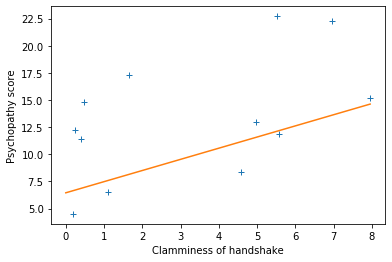

In [14]:
x_vals = [0, max(clammy)]
y_vals = [my_best_line(0), my_best_line(max(clammy))]
plt.plot(clammy, psychopathy, '+')
plt.plot(x_vals, y_vals)
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

# Contrast
- Our example: $Psychopathy=\theta _{0}+\theta_{1}\times Clamminess +\theta_{2}\times Age$<br>
- Using the equation $\hat\theta=(X^\top{X})^{-1}X^\top{Y}$, we can estimate the optimal $\hat\theta_{0}$, $\hat\theta_{1}$, and $\hat\theta_{2}$ that minimize the actual data and regression line (i.e., MSE).
- Now, you want to know which variable (e.g., clamminess or age?) is more important to predict the level of psychopathy.

- The concept of 'Contrast' $(C)$ appear here, which is multiplied by $\hat\theta$ (i.e., $C^{T}\hat\theta$ ) that can select the variable of interest. More formally, the 'Contrast' is a set of coefficients that '<i>contrast</i>' the paramter estimates ($\hat\theta$).<br><br>
- For instance, if your interest is the effect of clamminess, your contrat is 
$\tiny\left[\begin{array}{c}
0 \\
1 \\
0
\end{array}\right]$, and if its transposed form is multiplied with 
$\tiny\left[\begin{array}{c}
\hat\theta_{0} \\
\hat\theta_{1} \\
\hat\theta_{2}
\end{array}\right]$, then it (=$C^{T}\hat\theta$) serves a role of variable selection providing $\hat\theta_{1}$ (=our estimate of the slope relating clamminess to psychopathy).<br><br>

- Now, your hypothesis is whether this slope (=$\hat\theta_{1}$) is significantly different from zero.
    - Null hypothesis: $\hat\theta_{1} = 0 $
    - Alternative hypothesis: $\hat\theta_{1} \neq 0 $

# Statistical significance
- t statistic $=\frac{contrast\ of \\estimated \\parameters}{\sqrt{variance\\ estimate}}=\frac{c^{T} \hat{\theta}}{\sqrt{\operatorname{var}\left(c^{T} \hat{\theta}\right)}} = \frac{c^{T} \hat{\theta}}{\sqrt{\hat{\sigma}^{2} c^{T}\left(X^{T} X\right)^{-1} c}} \sim t_{N-p}$, where $\hat{\sigma}^{2} = \frac{\widehat{\varepsilon}^{T} \hat{\varepsilon}}{N-p}$, N = # of samples, and p = # of independent variables.

In [15]:
from scipy.stats import t as t_dist

def t_stat(y, X, c):
    """ betas, t statistic and significance test given data, design matrix, contrast
        This is OLS estimation; we assume the errors to have independent
        and identical normal distributions around zero for each $i$ in $\e_i$ (i.i.d)."""
    
    # Make sure y, X, c are all arrays
    y = np.asarray(y)
    X = np.asarray(X)
    c = np.atleast_2d(c).T  # As column vector
    
    # Calculate the parameters - b hat
    beta = npl.pinv(X).dot(y)
    # The fitted values - y hat
    fitted = X.dot(beta)
    # Residual error
    errors = y - fitted
    
    # Residual sum of squares
    RSS = (errors**2).sum(axis=0)
    
    # Degrees of freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor
    # columns in X are independent then the (matrix rank of X) == p
    # (where p the number of columns in X). If there is one column that
    # can be expressed as a linear sum of the other columns then
    # (matrix rank of X) will be p - 1 - and so on.
    df = X.shape[0] - npl.matrix_rank(X)
    
    # Mean residual sum of squares
    MRSS = RSS / df
    # calculate bottom half of t statistic
    SE = np.sqrt(MRSS * c.T.dot(npl.pinv(X.T.dot(X)).dot(c)))
    t = c.T.dot(beta) / SE
    
    # Get p value for t value using cumulative density dunction
    # (CDF) of t distribution
    ltp = t_dist.cdf(t, df) # lower tail p
    p = 1 - ltp # upper tail p
    return beta, t, df, p

In [16]:
X = np.column_stack((np.ones(12), clammy, age))
Y = np.asarray(psychopathy)
B, t, df, p = t_stat(Y, X, [0, 1, 0])
t, p

(array([[1.771261]]), array([[0.055143]]))

In [17]:
X = np.column_stack((np.ones(12), clammy, age))
Y = np.asarray(psychopathy)
B, t, df, p = t_stat(Y, X, [0, 0, 1])
t, p

(array([[0.150201]]), array([[0.441959]]))

### Isn't it simply multiple linear regression? Why is it then called 'General' linear model? 
- In fact, if combining a design matrix and contrast, any analyese below can be represented and tested by GLM.
    - One/Two sample or paired t-test
    - ANOVA, ANCOVA, MANOVA, MANCOVA
    - Factorial design
    - Correlation, partial correlation
    - Simple, Multiple linear regression
    <br><br>
$\tiny\begin{bmatrix} y^{1} \\ y^{2} \\ y^{3} \\ \vdots \\ y^{m} \end{bmatrix}=\begin{bmatrix} 1 & X_{1}^{1} & X_{3}^{1} & \ldots & x_{n}^{1} & \\ 1 & X_{1}^{2} & X_{2}^{2} & \ldots & x_{n}^{2} \\ 1 & X_{1}^{3} & X_{2}^{3} & \ldots & x_{n}^{3} \\ \vdots & \vdots & \vdots & \ddots & \vdots & \\ 1 & X_{1}^{m} & X_{2}^{m} & \ldots & x_{n}^{m}\end{bmatrix}\begin{bmatrix} \theta _{0} \\ \theta _{1} \\ \theta _{2} \\ \vdots \\ \theta_{n}\end{bmatrix}+\begin{bmatrix} e_{0} \\ e_{1} \\ e_{2} \\ \vdots \\ e_{m}\end{bmatrix}$<br>
- Expressing group membership in a design matrix allows us to perform ANOVA (or two sample t-test).

# Dummy coding and GLM
- Go back to the same example (i.e. relationship between psychopathy, clamminess, and age). 
- Let's say it turns out that among 12 samples, the first 4 students come from SKKU, the second 4 from SNU, and another last 4 come from Yonsei.
- Unlike clamminess or age, this group information is not continuous but categorical variables, which need to be converted into the dummy variable.
<br><br>
- Dummy variable: a binary-encoded number to indicate each membership of a categorical variable (e.g., gender, race).

In [18]:
# One-way ANOVA
SKK_indicator = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
SNU_indicator = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
YON_indicator = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

# Design matrix (ANOVA)
X = np.column_stack((SKK_indicator, SNU_indicator, YON_indicator))
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

- $\tiny\hat\theta=(X^\top{X})^{-1}X^\top{Y}$ if $\tiny(X^\top{X})^{-1}X^\top$ is invertible.<br>
- $\tiny\hat\theta=X^{+}Y$ if $\tiny(X^\top{X})^{-1}X^\top$ is not invertible ($X^{+}$ is pseudoinverse).

In [19]:
B = npl.pinv(X).dot(psychopathy)
B

array([10.74225, 11.3355 , 18.03425])

In [20]:
# SSKU
np.mean(psychopathy[:4])

10.74225

In [21]:
# SNU
np.mean(psychopathy[4:8])

11.3355

In [22]:
# Yonsei
np.mean(psychopathy[8:])

18.03425

In [23]:
# Contrast (Yonsei vs. (SKKU | SNU)
B, t, df, p = t_stat(psychopathy, X, [-0.5, -0.5, 1])
t, p

# The design matrix and contrast express an one-way ANOVA model representing the eeffect of group membership

(array([[2.340356]]), array([[0.021997]]))

In [24]:
# ANCOVA
SKK_indicator = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
SNU_indicator = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
YON_indicator = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

# Design matrix (ANOVA)
X = np.column_stack((SKK_indicator, SNU_indicator, YON_indicator, clammy, age))
X

array([[ 1.   ,  0.   ,  0.   ,  0.389, 22.5  ],
       [ 1.   ,  0.   ,  0.   ,  0.2  , 25.3  ],
       [ 1.   ,  0.   ,  0.   ,  0.241, 24.6  ],
       [ 1.   ,  0.   ,  0.   ,  0.463, 21.4  ],
       [ 0.   ,  1.   ,  0.   ,  4.585, 20.7  ],
       [ 0.   ,  1.   ,  0.   ,  1.097, 23.3  ],
       [ 0.   ,  1.   ,  0.   ,  1.642, 23.8  ],
       [ 0.   ,  1.   ,  0.   ,  4.972, 21.7  ],
       [ 0.   ,  0.   ,  1.   ,  7.957, 21.3  ],
       [ 0.   ,  0.   ,  1.   ,  5.585, 25.2  ],
       [ 0.   ,  0.   ,  1.   ,  5.527, 24.6  ],
       [ 0.   ,  0.   ,  1.   ,  6.964, 21.8  ]])

In [25]:
# Contrast (Yonsei vs. (SKKU | SNU)
B, t, df, p = t_stat(psychopathy, X, [0, 0, 0, 1, 0])
t, p

(array([[-0.654275]]), array([[0.733084]]))

# Interim summary
- Verification in data mining refers a set of statsitcal tests to assess predefined hypotheses.
- A wide range of statistical tests exist to compare the group mean effect and assess correlation/interaction effects.
- General Linear Model (GLM) provides a multi-potent framework to perform most statistical tests mentioned, based on an integrative form of linear models.
- Depending on how to construct a design matrix and setup the contast, one can express various forms of statsitcal tests, a unique strength that makes this approach widely used in the neuroscience. 
- GLM is inherently a well-fit tool to perform massive univarate/multivariate statistical tests. However, in order to obtain proper statistics out of tens of thousans of massive tests, one has to carefully consider a multiple-testing issue. 